# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [344]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from sklearn.metrics import confusion_matrix

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [270]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [271]:
# # Your code here

pd.options.display.max_columns =25

websites.head()


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [272]:
websites.shape

(1781, 21)

In [273]:
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [274]:
# websites.dtypes

**What the dataset looks like?**

Parece que el dataset recopila información relativa a una petición hacia un Website determinado.

**What are the data types?**

Predomina el formato de "entero", pero tabién hay diversas columnas de tipo "string"

**Which columns contain the features of the websites?**

Todas las columnas, de momento.

**Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?**

Queremos predecir la columna "URL"

La clave es la primera letra de dicha columna.

**Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?**

URL, WHOIS_COUNTRY, SERVER, CHARSET	

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [275]:
# Your code here
corrMatrix = websites.corr(method="pearson")

corrMatrix

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


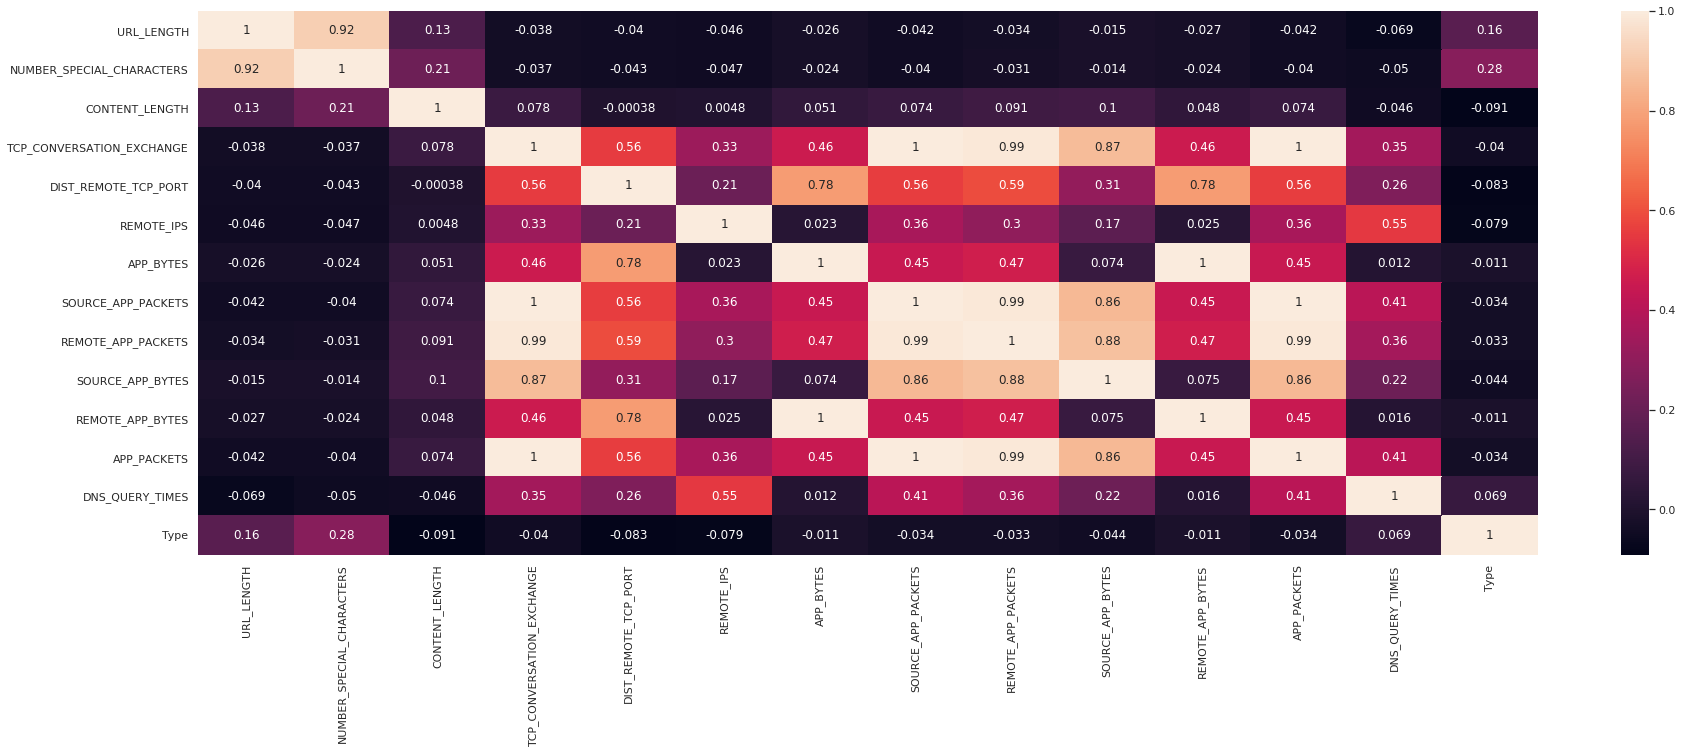

In [276]:
fig, ax = plt.subplots(figsize=(30,10))  

ax = sns.heatmap(corrMatrix, annot=True)

Your comment here

Existen varias columnas con correlación perfecta más allá de sí mismas (diagonal principal), por tanto hay que eliminarlas para no redundar en la información.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

** CRITERIO: Se procede a la eliminación de aquellas columnas cuyo coeficiente de correlación sea superior al 0,90 con respecto al resto de columnas**

In [277]:
def representation(df):
    fig, ax = plt.subplots(figsize=(30,10))  
    corrMatrix = df.corr(method="pearson")
    ax = sns.heatmap(corrMatrix, annot=True)

    return ax


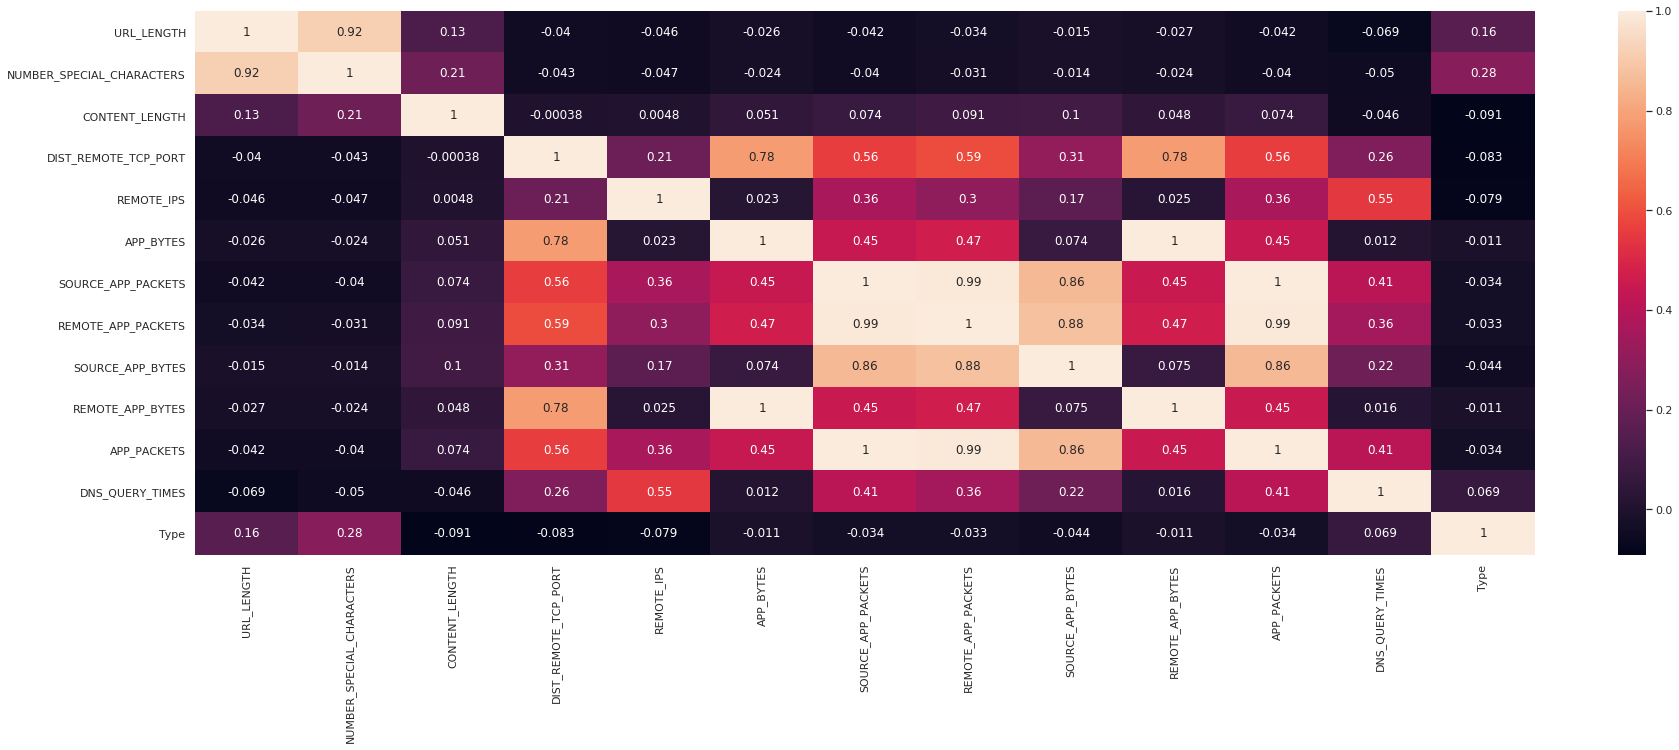

In [278]:
#En primer lugar, elimino la columna con el número de coeficientes de correlación más elevados.

representation(websites.drop(["TCP_CONVERSATION_EXCHANGE"], axis=1))


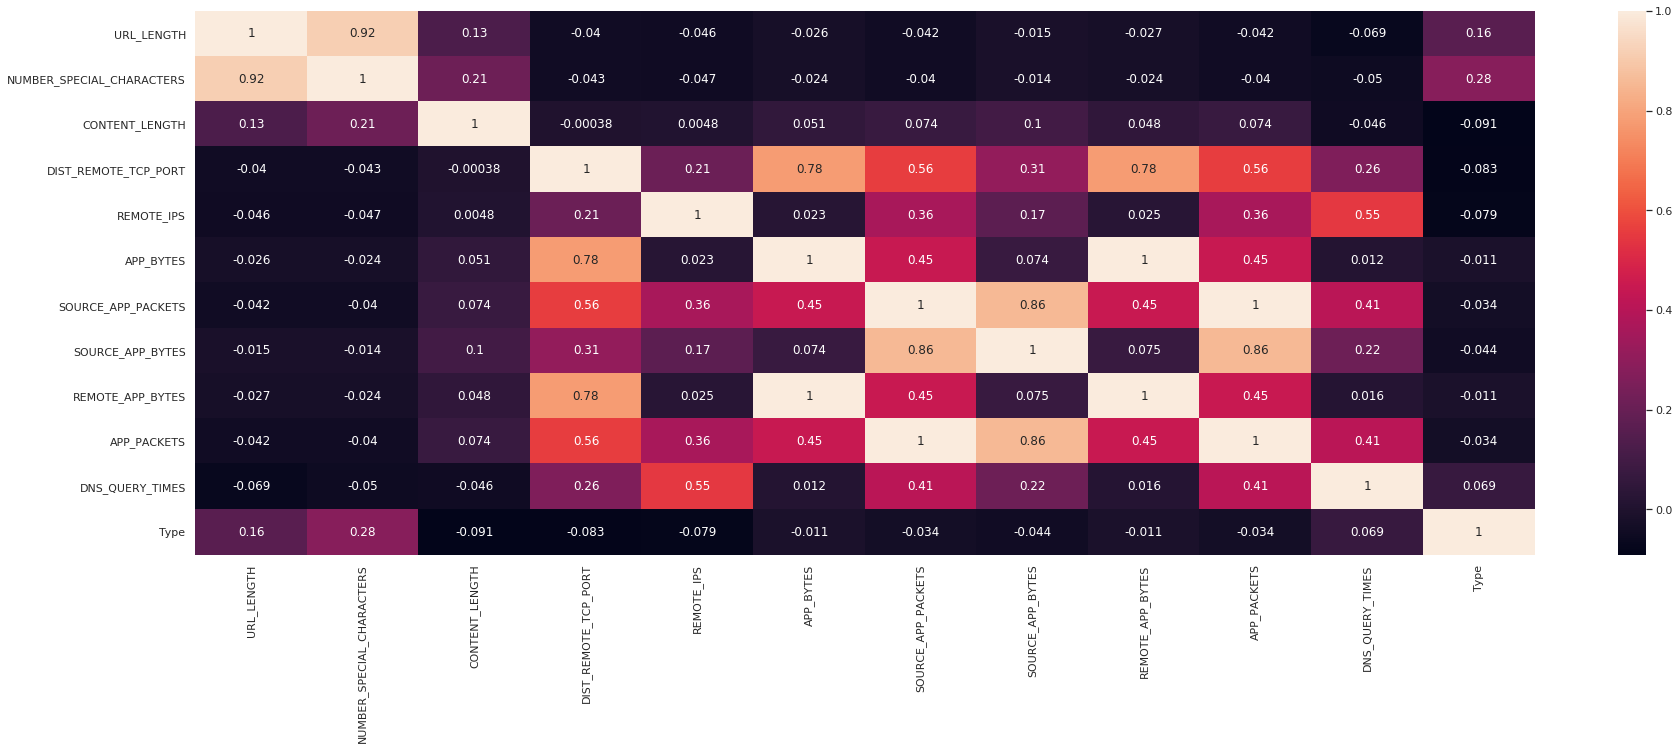

In [279]:
# A continuación se observa como la columna ["Source_app_packets"] presenta una alta correlación positiva con ["Remote_App_Packets"]. Por tanto se procede a su eliminación para evitar información redundante

second = representation(websites.drop(["TCP_CONVERSATION_EXCHANGE", "REMOTE_APP_PACKETS"], axis=1))

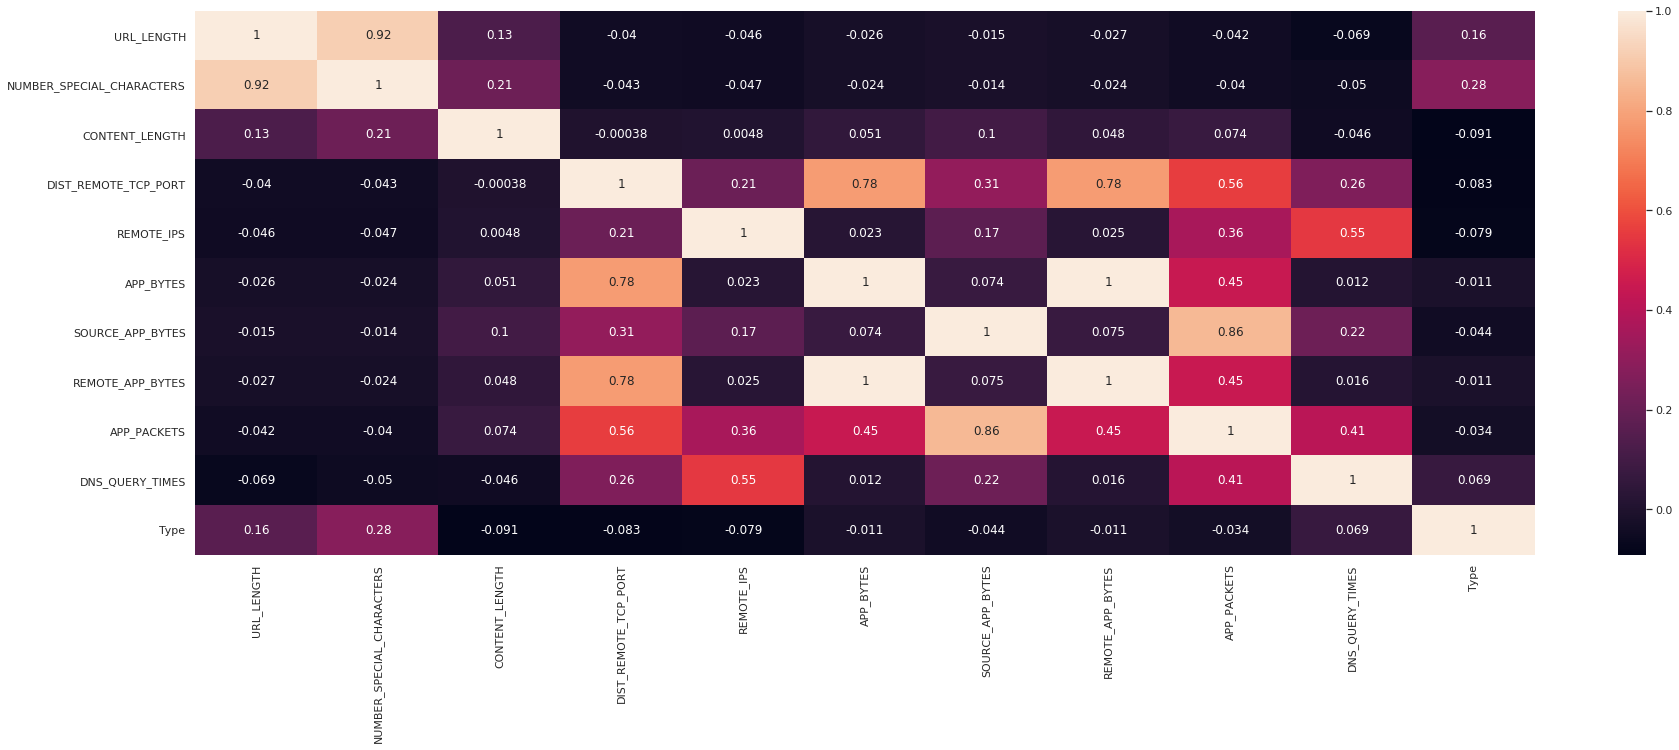

In [280]:
#En tercer lugar, se observa una correlación perfecta entre "App_Bytes" y "Remote App Bytes". La primera será eliminada.abs
#PD: Remote app bytes no fue eliminada en el paso anterior porque "Remote app packets" también presentaba una fuerte correlación con "App Bytes" y, por tanto, el resultado hubiera sido el mismo.


third = representation(websites.drop(["TCP_CONVERSATION_EXCHANGE", "SOURCE_APP_PACKETS", "REMOTE_APP_PACKETS"], axis=1))

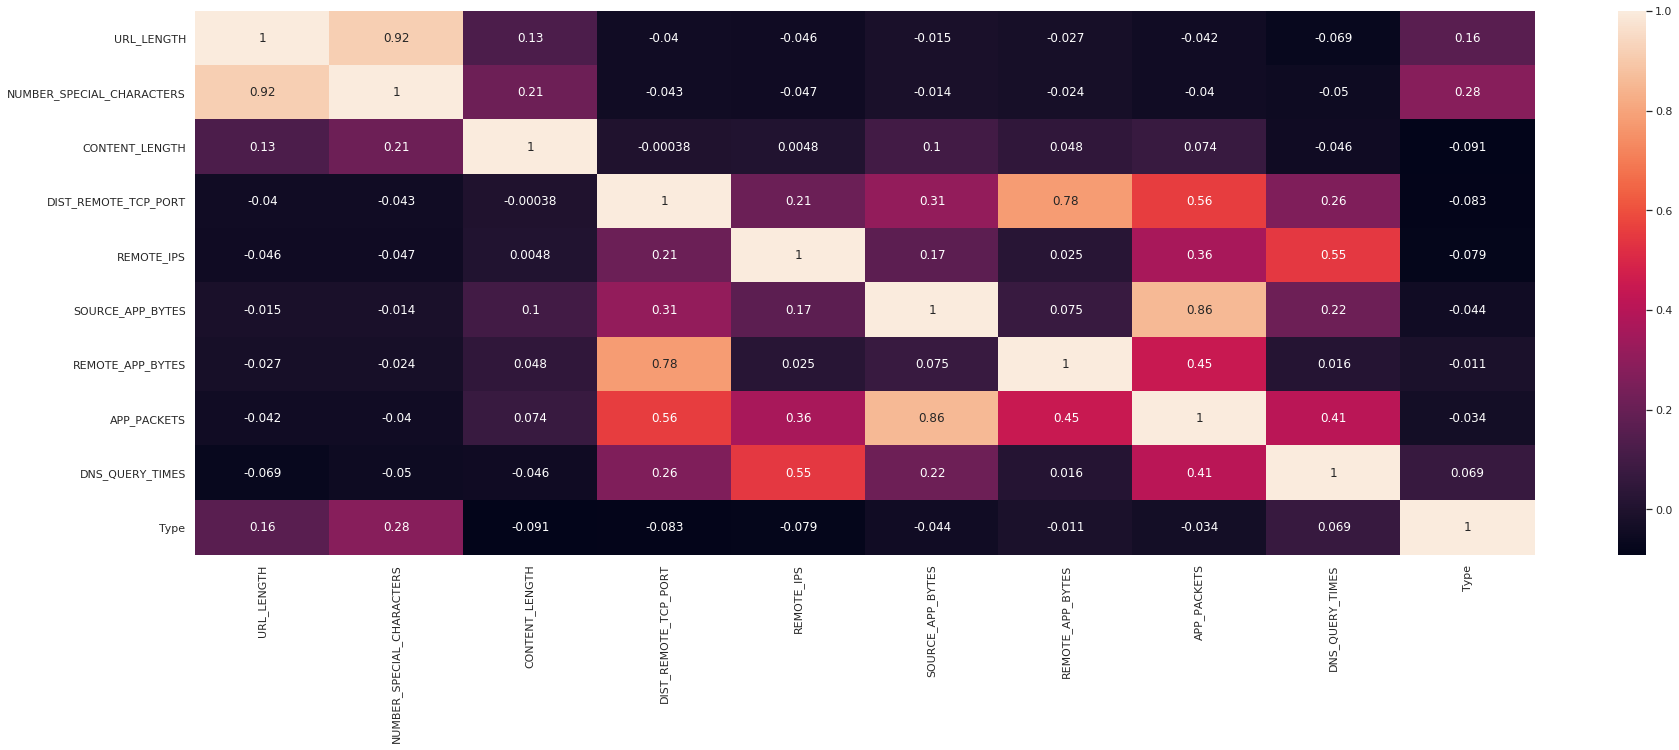

In [281]:
fourth = representation(websites.drop(["TCP_CONVERSATION_EXCHANGE", "SOURCE_APP_PACKETS", "REMOTE_APP_PACKETS", "APP_BYTES"], axis=1))

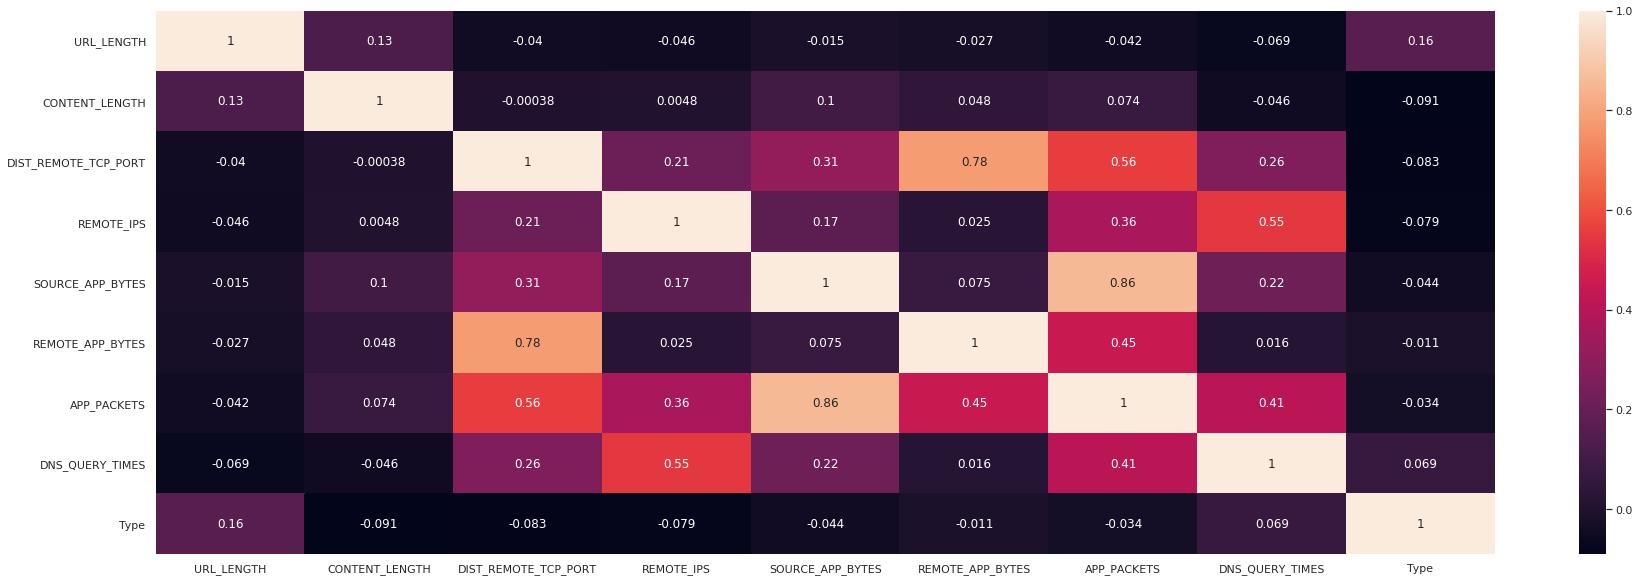

In [282]:
fifth = representation(websites.drop(["TCP_CONVERSATION_EXCHANGE", "SOURCE_APP_PACKETS", "REMOTE_APP_PACKETS", "APP_BYTES","NUMBER_SPECIAL_CHARACTERS"], axis=1))

In [283]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [284]:
websites2 = websites[['URL', 'URL_LENGTH','CHARSET', 'SERVER','CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE','WHOIS_UPDATED_DATE','DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES','APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']]

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [285]:
websites2.head(6)

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,7,4,1265,1230,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,18784,4380,39,8.0,0
4,B0_403,17,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,2,5,129889,4586,61,4.0,0
5,B0_2064,18,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,6,9,838,894,11,0.0,0


In [286]:
# Your code here

websites2.isnull().sum()


URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
SOURCE_APP_BYTES          0
REMOTE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

In [287]:
websites2.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
CONTENT_LENGTH          float64
WHOIS_COUNTRY            object
WHOIS_STATEPRO           object
WHOIS_REGDATE            object
WHOIS_UPDATED_DATE       object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
SOURCE_APP_BYTES          int64
REMOTE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [288]:
websites2["SERVER"].value_counts()[:1]

Apache    386
Name: SERVER, dtype: int64

In [289]:
#Columna de strings con "formato numérico". Como solo falta un valor y ya hay otros 0 presentes en otros DataPoints... pues rellenamos con un 0
websites2["DNS_QUERY_TIMES"] = websites["DNS_QUERY_TIMES"].fillna(0);

#Columna de strings, rellenamos con la moda (el valor más frecuente)
websites2["SERVER"] = websites["SERVER"].fillna("Apache");




In [290]:
#La última columna con valores nulos "CONTENT_LENGTH" contiene bastantes valores nulos... estimamos la proporción de nulos respecto del total

websites2["CONTENT_LENGTH"].isnull().sum()/websites2.shape[0]

0.45592363840539024

In [291]:
#Con casi la mitad de los valores nulos, la columna no tiene sentido. Se procede a su eliminación:


websites2.drop(["CONTENT_LENGTH"], axis=1, inplace=True)


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [292]:
# Examine missing values in each column

websites2.isnull().sum()


URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
SOURCE_APP_BYTES        0
REMOTE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [293]:
websites2.head()

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,None,None,None,None,7,4,1265,1230,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,18784,4380,39,8.0,0
4,B0_403,17,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,2,5,129889,4586,61,4.0,0


In [294]:
# Your code here

websites2["WHOIS_COUNTRY"].value_counts()


US                1103
None               306
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
IN                  10
UK                  10
CN                  10
FR                   9
CZ                   9
CH                   6
NL                   6
KR                   5
[u'GB'; u'UK']       5
AT                   4
PH                   4
ru                   4
BS                   4
SC                   3
HK                   3
KY                   3
TR                   3
SE                   3
us                   3
DE                   3
BE                   3
RU                   2
KG                   2
NO                   2
SI                   2
BR                   2
Cyprus               2
IL                   2
UA                   2
UY                   2
se                   1
AE                   1
LV                   1
TH                   1
United Kingdom       1
LU         

In [295]:
websites2.replace({"WHOIS_COUNTRY":{"Cyprus":"CY","se":"SE", "us":"US","[u'GB'; u'UK']":"GB, United Kingdom,", "ru":"RU","United Kingdom":"UK", "se":"SE"}}, inplace=True);

In [296]:
#Comprobación
websites2["WHOIS_COUNTRY"].loc[websites2["WHOIS_COUNTRY"]=="SE"]

30      SE
153     SE
1111    SE
1330    SE
Name: WHOIS_COUNTRY, dtype: object

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

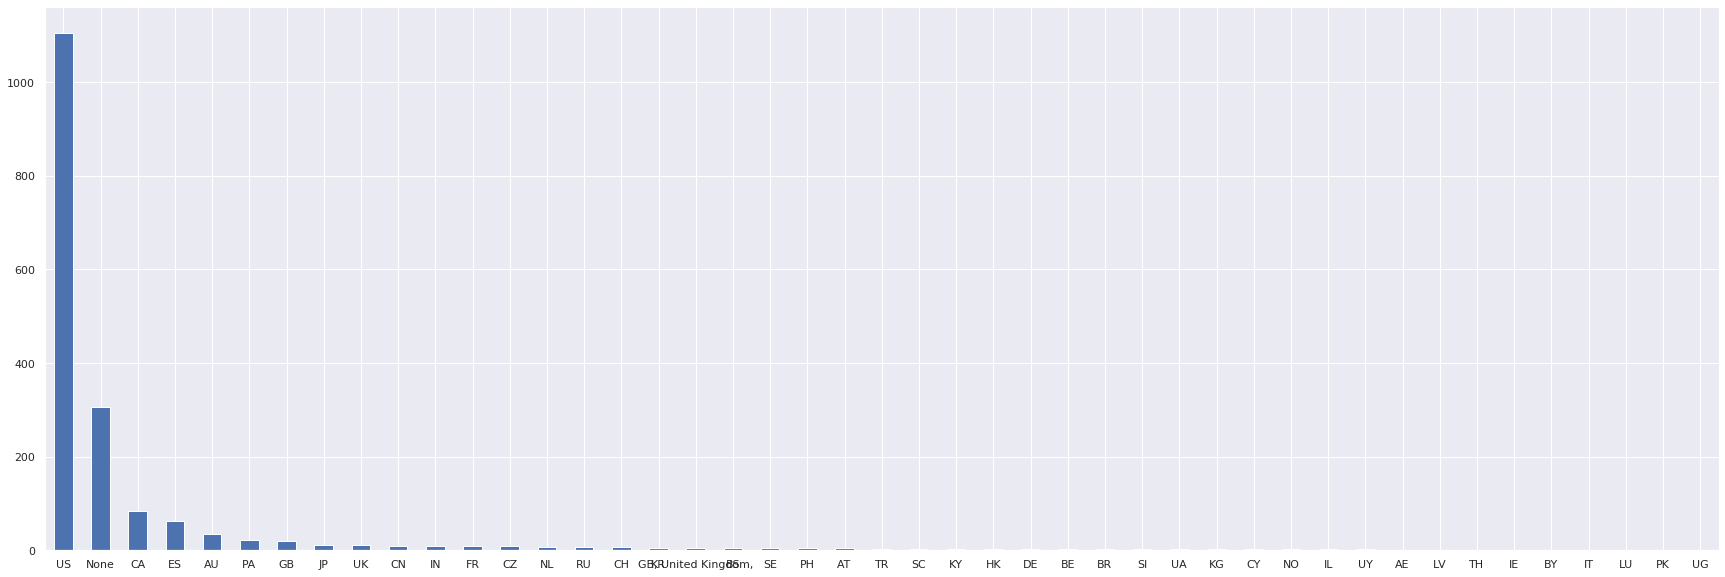

In [297]:
# Your code here

toRepresent = websites2["WHOIS_COUNTRY"].value_counts()

fig, ax = plt.subplots(figsize=(30,10)) 
ax = toRepresent.plot.bar(rot=0)


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [298]:
# Your code here
bestCountry = websites2["WHOIS_COUNTRY"].value_counts()[:10].index


In [299]:

websites2[~websites2["WHOIS_COUNTRY"].isin(bestCountry)] = "OTHER"

In [300]:
websites2["WHOIS_COUNTRY"].loc[websites2["WHOIS_COUNTRY"]=="OTHER"]

5       OTHER
16      OTHER
30      OTHER
39      OTHER
44      OTHER
        ...  
1667    OTHER
1701    OTHER
1705    OTHER
1733    OTHER
1770    OTHER
Name: WHOIS_COUNTRY, Length: 115, dtype: object

In [301]:
len(websites2["WHOIS_COUNTRY"].loc[websites2["WHOIS_COUNTRY"]=="OTHER"])


115

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [302]:
# Your code here
websites2.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

In [303]:
websites2.head()

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,None,0,2,1153,832,9,2,1
1,B0_2314,16,UTF-8,Apache/2.4.10,None,7,4,1265,1230,17,0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,None,0,0,0,0,0,0,0
3,B0_113,17,ISO-8859-1,nginx,US,22,3,18784,4380,39,8,0
4,B0_403,17,UTF-8,None,US,2,5,129889,4586,61,4,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [304]:
# Your code here

websites2.dtypes

URL                     object
URL_LENGTH              object
CHARSET                 object
SERVER                  object
WHOIS_COUNTRY           object
DIST_REMOTE_TCP_PORT    object
REMOTE_IPS              object
SOURCE_APP_BYTES        object
REMOTE_APP_BYTES        object
APP_PACKETS             object
DNS_QUERY_TIMES         object
Type                    object
dtype: object

In [305]:
cols = ['URL_LENGTH','DIST_REMOTE_TCP_PORT','REMOTE_IPS', 'SOURCE_APP_BYTES','REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']

websites2[cols] = websites2[cols].apply(pd.to_numeric, errors='coerce')

In [306]:
websites2.dtypes

URL                      object
URL_LENGTH              float64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT    float64
REMOTE_IPS              float64
SOURCE_APP_BYTES        float64
REMOTE_APP_BYTES        float64
APP_PACKETS             float64
DNS_QUERY_TIMES         float64
Type                    float64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [307]:
# Your code here

websites2.drop(['URL'], axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [308]:
# Your code here

websites2["CHARSET"].value_counts()

UTF-8           636
ISO-8859-1      393
utf-8           356
us-ascii        146
iso-8859-1      125
OTHER           115
None              7
windows-1252      1
ISO-8859          1
windows-1251      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [309]:
# Your code here

websites2["SERVER"].value_counts()

Apache                                                                                          360
nginx                                                                                           195
None                                                                                            171
OTHER                                                                                           115
Microsoft-HTTPAPI/2.0                                                                           106
                                                                                               ... 
Apache/2.4.6 (Red Hat Enterprise Linux) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 Communique/4.2.0      1
mw2257.codfw.wmnet                                                                                1
Boston.com Frontend                                                                               1
nginx/0.8.55                                                                                      1


![Think Hard](../think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [310]:
# Your code here

websites2.loc[websites2['SERVER'].str.contains('Microsoft', case=False), 'SERVER'] = 'Microsoft'

websites2.loc[websites2['SERVER'].str.contains('nginx', case=False), 'SERVER'] = 'nginx'

websites2.loc[websites2['SERVER'].str.contains('Apache', case=False), 'SERVER'] = 'Apache'


In [311]:
# Count `SERVER` value counts here

websites2["SERVER"].value_counts()


Apache                597
nginx                 397
Microsoft             187
None                  171
OTHER                 115
                     ... 
mw2232.codfw.wmnet      1
MI                      1
openresty/1.11.2.2      1
mw2110.codfw.wmnet      1
mw2231.codfw.wmnet      1
Name: SERVER, Length: 100, dtype: int64

In [312]:
websites2.head()

,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16.0,iso-8859-1,nginx,None,0.0,2.0,1153.0,832.0,9.0,2.0,1.0
1,16.0,UTF-8,Apache,None,7.0,4.0,1265.0,1230.0,17.0,0.0,0.0
2,16.0,us-ascii,Microsoft,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17.0,ISO-8859-1,nginx,US,22.0,3.0,18784.0,4380.0,39.0,8.0,0.0
4,17.0,UTF-8,None,US,2.0,5.0,129889.0,4586.0,61.0,4.0,0.0


In [313]:
websites2["SERVER"].loc[~websites2['SERVER'].isin(["Microsoft", "nginx", "Apache"])] = "OTHER"

In [314]:
websites2.head()

,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16.0,iso-8859-1,nginx,None,0.0,2.0,1153.0,832.0,9.0,2.0,1.0
1,16.0,UTF-8,Apache,None,7.0,4.0,1265.0,1230.0,17.0,0.0,0.0
2,16.0,us-ascii,Microsoft,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17.0,ISO-8859-1,nginx,US,22.0,3.0,18784.0,4380.0,39.0,8.0,0.0
4,17.0,UTF-8,OTHER,US,2.0,5.0,129889.0,4586.0,61.0,4.0,0.0


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [315]:
# Your code here

website_dummy = pd.get_dummies(websites2,  columns=['SERVER'])


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [316]:
# Your code here

website_dummy.head(10)


,URL_LENGTH,CHARSET,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,SERVER_Apache,SERVER_Microsoft,SERVER_OTHER,SERVER_nginx
0,16.0,iso-8859-1,None,0.0,2.0,1153.0,832.0,9.0,2.0,1.0,0,0,0,1
1,16.0,UTF-8,None,7.0,4.0,1265.0,1230.0,17.0,0.0,0.0,1,0,0,0
2,16.0,us-ascii,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,17.0,ISO-8859-1,US,22.0,3.0,18784.0,4380.0,39.0,8.0,0.0,0,0,0,1
4,17.0,UTF-8,US,2.0,5.0,129889.0,4586.0,61.0,4.0,0.0,0,0,1,0
5,NaN,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
6,18.0,iso-8859-1,US,0.0,3.0,8559.0,1327.0,14.0,2.0,0.0,1,0,0,0
7,19.0,us-ascii,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
8,20.0,utf-8,None,0.0,0.0,213.0,146.0,2.0,2.0,1.0,0,0,0,1
9,20.0,utf-8,None,0.0,0.0,62.0,146.0,2.0,2.0,1.0,0,0,0,1


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [317]:
website_dummy.dtypes

URL_LENGTH              float64
CHARSET                  object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT    float64
REMOTE_IPS              float64
SOURCE_APP_BYTES        float64
REMOTE_APP_BYTES        float64
APP_PACKETS             float64
DNS_QUERY_TIMES         float64
Type                    float64
SERVER_Apache             uint8
SERVER_Microsoft          uint8
SERVER_OTHER              uint8
SERVER_nginx              uint8
dtype: object

In [318]:
from sklearn.model_selection import train_test_split

# Your code here:

X_train, X_test, y_train, y_test = train_test_split(website_dummy.drop(columns="Type"), website_dummy["Type"], test_size=0.2)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [319]:
# Your code here:

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(C=10,solver="lbfgs")

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [320]:
# Your code here:

# model1.fit(X_train, y_train)


In [321]:
# ALEX WAY:

website_fixed = pd.get_dummies(data=website_dummy,  columns=['WHOIS_COUNTRY']);

website_fixed = pd.get_dummies(data=website_fixed,  columns=['CHARSET']);


In [322]:
website_fixed.head()

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,SERVER_Apache,SERVER_Microsoft,SERVER_OTHER,SERVER_nginx,...,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,CHARSET_ISO-8859,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_OTHER,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252
0,16.0,0.0,2.0,1153.0,832.0,9.0,2.0,1.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0
1,16.0,7.0,4.0,1265.0,1230.0,17.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0
2,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
3,17.0,22.0,3.0,18784.0,4380.0,39.0,8.0,0.0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0,0,0
4,17.0,2.0,5.0,129889.0,4586.0,61.0,4.0,0.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0,0,0


In [323]:
website_fixed.isnull().sum()

URL_LENGTH              115
DIST_REMOTE_TCP_PORT    115
REMOTE_IPS              115
SOURCE_APP_BYTES        115
REMOTE_APP_BYTES        115
APP_PACKETS             115
DNS_QUERY_TIMES         115
Type                    115
SERVER_Apache             0
SERVER_Microsoft          0
SERVER_OTHER              0
SERVER_nginx              0
WHOIS_COUNTRY_AU          0
WHOIS_COUNTRY_CA          0
WHOIS_COUNTRY_CN          0
WHOIS_COUNTRY_ES          0
WHOIS_COUNTRY_GB          0
WHOIS_COUNTRY_JP          0
WHOIS_COUNTRY_None        0
WHOIS_COUNTRY_OTHER       0
WHOIS_COUNTRY_PA          0
WHOIS_COUNTRY_UK          0
WHOIS_COUNTRY_US          0
CHARSET_ISO-8859          0
CHARSET_ISO-8859-1        0
CHARSET_None              0
CHARSET_OTHER             0
CHARSET_UTF-8             0
CHARSET_iso-8859-1        0
CHARSET_us-ascii          0
CHARSET_utf-8             0
CHARSET_windows-1251      0
CHARSET_windows-1252      0
dtype: int64

In [324]:
website_fixed.dropna(inplace=True)

In [325]:
website_fixed.isnull().sum()

URL_LENGTH              0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
SOURCE_APP_BYTES        0
REMOTE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
SERVER_Apache           0
SERVER_Microsoft        0
SERVER_OTHER            0
SERVER_nginx            0
WHOIS_COUNTRY_AU        0
WHOIS_COUNTRY_CA        0
WHOIS_COUNTRY_CN        0
WHOIS_COUNTRY_ES        0
WHOIS_COUNTRY_GB        0
WHOIS_COUNTRY_JP        0
WHOIS_COUNTRY_None      0
WHOIS_COUNTRY_OTHER     0
WHOIS_COUNTRY_PA        0
WHOIS_COUNTRY_UK        0
WHOIS_COUNTRY_US        0
CHARSET_ISO-8859        0
CHARSET_ISO-8859-1      0
CHARSET_None            0
CHARSET_OTHER           0
CHARSET_UTF-8           0
CHARSET_iso-8859-1      0
CHARSET_us-ascii        0
CHARSET_utf-8           0
CHARSET_windows-1251    0
CHARSET_windows-1252    0
dtype: int64

In [326]:
X_train, X_test, y_train, y_test = train_test_split(website_fixed.drop(columns="Type"), website_fixed["Type"], test_size=0.2)
model2 = LogisticRegression(C=10,solver="lbfgs")
model2.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [340]:
# Your code here:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model2.predict(X_test)
print("Evaluating model")
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1Score",f1_score(y_test, y_pred))

Evaluating model
Accuracy 0.9281437125748503
Precision 1.0
Recall 0.29411764705882354
F1Score 0.45454545454545453


What are your thoughts on the performance of the model? Write your conclusions below.

El F1Score, que recapitula los resultados de precisión y recall, es bastante bajo.

Por tanto, el resultado del modelo es malo.


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [341]:
# Your code here:

neigh = KNeighborsClassifier(n_neighbors=3)

neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [342]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [343]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = neigh.predict(X_test)
print("Evaluating model")
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1Score",f1_score(y_test, y_pred))

Evaluating model
Accuracy 0.9341317365269461
Precision 0.6764705882352942
Recall 0.6764705882352942
F1Score 0.6764705882352942


El F1 Score es bastante superior al anterior modelo, por tanto, tiene mayor eficacia.

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

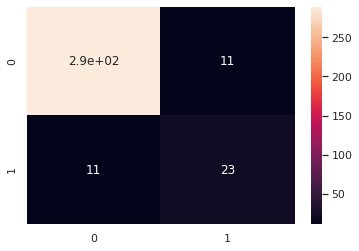

In [345]:
# Your code here:

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [346]:
# Your code here:

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print("Evaluating model")
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1Score",f1_score(y_test, y_pred))

Evaluating model
Accuracy 0.937125748502994
Precision 0.7241379310344828
Recall 0.6176470588235294
F1Score 0.6666666666666667


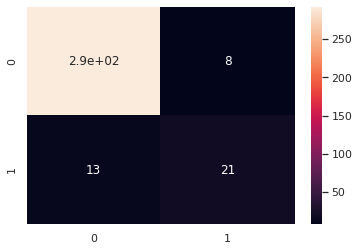

In [347]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions

No improvements lol

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here

In [ ]:
# Your comment here

